<a href="https://colab.research.google.com/github/artbogdanovai/fast_aicourse/blob/master/course/rice/standard_example_from_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#!pip install flake8 pycodestyle_magic

In [6]:
#%load_ext pycodestyle_magic

In [7]:
#%flake8_on

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
import tarfile

import torch.nn as nn
import torch.nn.functional as F

In [9]:
if not os.path.exists('data'):
    os.mkdir('data')

In [10]:
if torch.cuda.is_available(): 
    dev = "cuda:0" 
else: 
    dev = "cpu" 
device = torch.device(dev) 
device

device(type='cuda', index=0)

In [11]:

# tar = tarfile.open("cifar-10-python.tar.gz")
# tar.extractall()
# tar.close()
# os.rename('cifar-10-batches-py','data')

In [12]:
# import shutil
# shutil.rmtree('data') 

In [13]:
resized_size = 32
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((resized_size, resized_size))])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


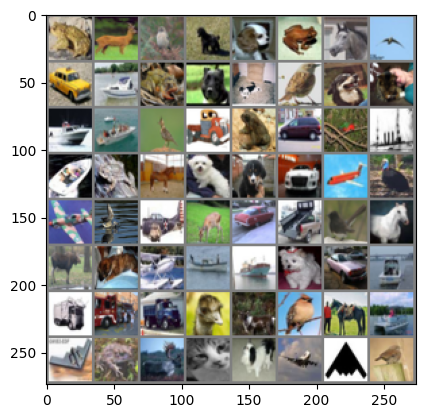

frog  deer  bird  dog   dog   frog  horse bird  car   ship  frog  dog   cat   bird  dog   cat   ship  ship  bird  truck frog  car   bird  ship  ship  frog  horse dog   dog   car   plane bird  plane bird  plane deer  car   truck bird  horse deer  dog   plane ship  ship  dog   car   ship  truck truck truck bird  deer  bird  horse ship  plane frog  deer  cat   dog   plane plane bird 


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [15]:
# ??nn.Conv2d

In [16]:
((32-4)/2-4)/2

5.0

In [17]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #print('input',x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        #print('conv1',x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        #print('conv2',x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch   
        #print('flatten',x.shape)     
        x = F.relu(self.fc1(x))
        #print('Linear1',x.shape)
        x = F.relu(self.fc2(x))
        #print('Linear2',x.shape)
        x = self.fc3(x)
        #print('output',x.shape)
        return x


net = Net()

net = net.to(device)

In [18]:
((480-4)/2 - 4) / 2

117.0

In [19]:
net.forward(images.to(device)).shape

torch.Size([64, 10])

In [20]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [21]:
%%time
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
    running_loss = 0.0

print('Finished Training')

[1,   782] loss: 0.900
[2,   782] loss: 0.873
[3,   782] loss: 0.775
[4,   782] loss: 0.709
[5,   782] loss: 0.658
[6,   782] loss: 0.620
[7,   782] loss: 0.590
[8,   782] loss: 0.565
[9,   782] loss: 0.546
[10,   782] loss: 0.529
Finished Training
CPU times: user 31 s, sys: 4.15 s, total: 35.1 s
Wall time: 1min 25s


In [22]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

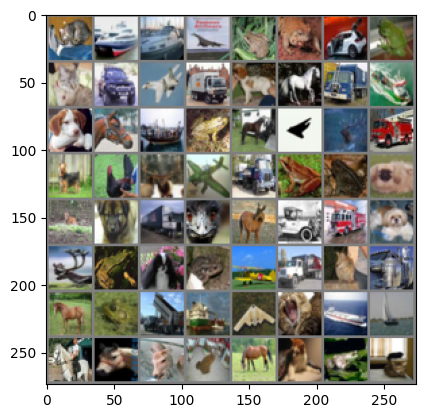

GroundTruth:  cat   ship  ship  plane


In [23]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [24]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [25]:
outputs = net(images)

In [26]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  car   ship 


In [27]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 50 %


In [28]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 43.4 %
Accuracy for class: car   is 68.4 %
Accuracy for class: bird  is 28.8 %
Accuracy for class: cat   is 30.0 %
Accuracy for class: deer  is 44.8 %
Accuracy for class: dog   is 46.1 %
Accuracy for class: frog  is 72.9 %
Accuracy for class: horse is 50.4 %
Accuracy for class: ship  is 72.9 %
Accuracy for class: truck is 51.1 %


In [43]:
input_size=output_size

In [44]:
output_size = ((input_size - 3 + 2 * 1) / 1 + 1)/2

In [45]:
output_size

30.0